<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Работа-с-выбросами" data-toc-modified-id="Работа-с-выбросами-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Работа с выбросами</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [65]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [3]:
try:    
    data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
except:    
    data = pd.read_csv('real_estate_data.csv', sep="\t")

Описание данных

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

In [19]:
def data_info(df):
    """Функция первичного знакомства с данными"""
    display(df.head(10))
    print('Общая информация:')
    display(df.info())
    print('Категориальные признаки:')
    display(df.describe(include = ['object']))
    print('Общая статистика:')
    display(df.describe())
    print('Дубликаты:')
    display(df.duplicated().sum())
    print('Процент пропущенных значений:')    
    for col in df.columns:
        pct_missing = np.mean(df[col].isna())
        if pct_missing > 0:
            print('{} - {}%'.format(col, round(pct_missing*100,2)))
            
    display(df.loc[df.isnull().any(axis=1)].head(5))

In [20]:
data_info(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  a

None

Категориальные признаки:


,first_day_exposition,is_apartment,locality_name
count,23699,2775,23650
unique,1491,2,364
top,2018-02-01T00:00:00,False,Санкт-Петербург
freq,368,2725,15721


Общая статистика:


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Дубликаты:


0

Процент пропущенных значений:
ceiling_height - 38.8%
floors_total - 0.36%
living_area - 8.03%
is_apartment - 88.29%
kitchen_area - 9.61%
balcony - 48.61%
locality_name - 0.21%
airports_nearest - 23.38%
cityCenters_nearest - 23.29%
parks_around3000 - 23.28%
parks_nearest - 65.91%
ponds_around3000 - 23.28%
ponds_nearest - 61.56%
days_exposition - 13.42%


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
# визуально оцениваем строки с пропусками
data.loc[data.isnull().any(axis=1)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


### Вывод

Было импортировано больше библиотек чем обычно, т.к. предстоит работать с форматом datetime.

В данных имеются пропуски, какие-то из них обоснованы отсутствием данных, а в других отсутствующее значение явялется показателем того или иного параметра.

## Предобработка данных

In [21]:
# проверим достаточность данных для возможности применить среднее значение к местах пропусков.

data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [22]:
#меняем тип данных с object на datetime64[ns] для дальнейшей обработки
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S', errors='ignore')

In [23]:
# убираем строки с значением комнат равным 0, таких значений в данных всего 192 
# и это критически не повлияет на дальнейщую визализацию данных
data =  data.loc[data['rooms'] != 0]

In [24]:
# убираем строки с значением отсутствующим значением общей этажности, таких значений в данных всего 86 
# и это критически не повлияет на дальнейщую визализацию данных
data = data.loc[data['floors_total'].isna() != True]

In [25]:
# все пропуски в колонке balcony со значением NaN имеет смысл считать что равны 0
# Так же сразу поменяем значение на int для дальнейших исседований
data['balcony'].fillna(0).astype('int')

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23419, dtype: int32

In [26]:
# заполним пропуски высоты потолка на медианное значение, т.к. 
# они максимально приближены к стандартам строительства и их можно считать корректными для исследования
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()).round(1)

In [27]:
# пропущенные значения можем считать 
data[['first_day_exposition', 'days_exposition']].isnull().any(axis=1)

0         True
1        False
2        False
3        False
4        False
         ...  
23694     True
23695    False
23696     True
23697    False
23698     True
Length: 23419, dtype: bool

In [28]:
# обработаем колонку locality_name, приведём строки к одному виду и заменим неочевидные дубликаты

data['locality_name'] = data['locality_name'].str.lower().replace(['посёлок ',
                                                                   'садоводческое некоммерческое товарищество',
                                                                   'садовое товарищество ', 
                                                                   'поселок ',
                                                                  'городской поселок ',
                                                                  'поселок городского типа ',
                                                                  'деревня ',
                                                                  'село ',
                                                                  'городского типа ',
                                                                  'городской '], '', regex=True)

In [29]:
len(list(data['locality_name'].sort_values().unique()))

308

In [30]:
# заменяем значения высоты пола на медиану
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()).round(1)

In [31]:
# комбинация методов groopby и transform позволит применить значения медианы площади кухни и жилой зоны
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform('median'))
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))

## Расчёты и добавление результатов в таблицу

Вычисляем square_meter_price (цену за квадратный метр комнаты)

In [32]:
# высчитываем цену за квадратный метр и меняем значение
# меняем тип значения, т.к. обычно цена квадратного метра указывается без десятых долей
data['square_meter_price'] = (data['last_price'] / (data['kitchen_area'] + data['living_area'])).astype('int')

Создаём колонки day_of_the_week_exposition, month_exposition и year_exposition

In [33]:
# создаём колонки дня недели/месяца/года написания объявления
data['day_of_the_week_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [34]:
# проверяем корректность заполнения
data[['first_day_exposition', 'day_of_the_week_exposition', 'month_exposition', 'year_exposition']].head(5)

,first_day_exposition,day_of_the_week_exposition,month_exposition,year_exposition
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


Создаём и заполняем колонку floor_categorie

In [35]:
# создаём колонку для дальнейшего переименования
data['floor_categorie'] = data['floor']
# переименовываем все 1 в 'первые' этажи
data['floor_categorie'] = data['floor_categorie'].where(data['floor_categorie'] != 1, 'первый')
# переименовываем все значения этажей которые сходятся с общей этажностью здания и присваиваем ему категорию 'последний'
data['floor_categorie'] = data['floor_categorie'].where(data['floor_categorie'] != data['floors_total'], 'последний')
# остальные значения переименовываем в 'другие'
data['floor_categorie'] = data['floor_categorie'].where((data['floor_categorie'] == 'первый') | (data['floor_categorie'] == 'последний'), 'другой')

In [36]:
# проверка корректности срабатывания категоризации
data['floor_categorie'].value_counts()

другой       17198
последний     3325
первый        2896
Name: floor_categorie, dtype: int64

In [37]:
# высчитываем соотношения кухни и жилой зоны к площади квартиры

data['total_area'] = data['kitchen_area'] + data['living_area']
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']
data['living_ratio'] = data['living_area'] / data['total_area']

# округляем значения для простоты понимания
data[['kitchen_ratio', 'living_ratio']].round(2)

,kitchen_ratio,living_ratio
0,0.33,0.67
1,0.37,0.63
2,0.19,0.81
3,0.17,0.83
4,0.56,0.44
...,...,...
23694,0.16,0.84
23695,0.18,0.82
23696,0.23,0.77
23697,0.43,0.57


In [38]:
# пропущенные значения в колонке days_exposition буду считать всё ещё 
# находящимися там на момент выгрузки данных, а значит нужно будет найти разницу, считая что день выгрузки БД это 2019-05-03

data.loc[data['days_exposition'].isnull()][['first_day_exposition', 'days_exposition']]

,first_day_exposition,days_exposition
0,2019-03-07,NaN
7,2019-04-18,NaN
44,2018-11-18,NaN
45,2018-12-02,NaN
46,2019-01-31,NaN
...,...,...
23684,2018-11-02,NaN
23685,2019-01-24,NaN
23694,2017-03-21,NaN
23696,2018-02-11,NaN


## Исследовательский анализ данных

изучены следующие параметры: площадь, цена, число комнат, высота потолков (заменены пропуски)

построены гистограммы для каждого параметра

In [39]:
# построим отдельный датасет для удобства работы с данными для потсроения гистограмм
histogramms_data = data[['total_area', 'square_meter_price', 'rooms', 'ceiling_height']]

<AxesSubplot:title={'center':'гистограмма столбца total_area'}, ylabel='Frequency'>

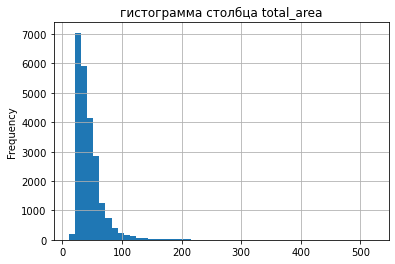

In [40]:
# гистограмма для колонки total_area
histogramms_data['total_area'].plot(kind='hist', bins=50, title='гистограмма столбца total_area', grid=True)

<AxesSubplot:title={'center':'цена за квадратный метр'}, ylabel='Frequency'>

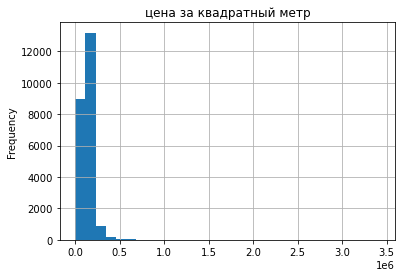

In [41]:
# гистограмма для колонки square_meter_price


histogramms_data['square_meter_price'].plot(kind='hist', y='square_meter_price', bins=30, title='цена за квадратный метр', grid=True)

<AxesSubplot:title={'center':'гистограмма по количеству комнат'}, ylabel='Frequency'>

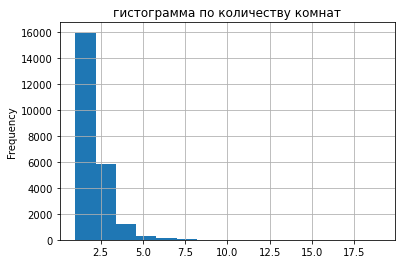

In [42]:
# гистограмма для колонки rooms
histogramms_data['rooms'].plot(kind='hist', y='rooms', bins=15, title='гистограмма по количеству комнат', grid=True)

<AxesSubplot:title={'center':'гистограмма по высоте потолка'}, ylabel='Frequency'>

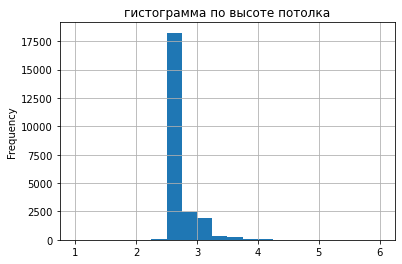

In [43]:
# гистограмма для колонки ceiling_height
histogramms_data['ceiling_height'].plot(kind='hist', bins=20, range=(1, 6), title='гистограмма по высоте потолка', grid=True)

# Задание
"Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
"Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."

In [44]:
#отбросим пропуски в колонке days_exposition т.к. квартиры на момент выгрузки не были проданы и не отвечают вопросам задачи

data['days_exposition'].dropna().describe()

count    20261.000000
mean       181.511722
std        220.045540
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

среднее значение равно 181.5 дням, а медиана 96 дням. Разлёт почти в 2 раза говорит нам о наличии выбросов и мы видим их в describe минимальное значение равно 1 день, а максимальное аж 1580 дням. Оценив график мы видим что большенство объявлений закрываются спустя 100 дней после открытия, далее идёт Паусоновское распредиление графика, стремящегося к 0

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

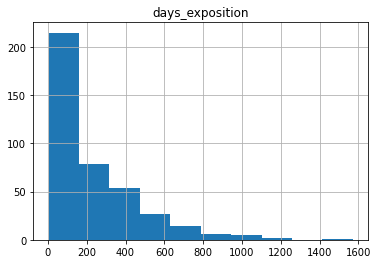

In [45]:
# анализируем выбросы в данных на гистограмме
data.dropna().hist('days_exposition')

<AxesSubplot:>

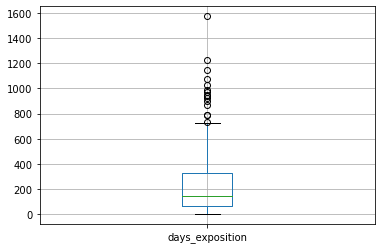

In [46]:
# анализируем выбросы в данных на диаграмме размаха
data.dropna().boxplot('days_exposition')

In [47]:
# определяем границы усов для устранения выбросов
outliners_days = data['days_exposition'].describe()

outliners_days_q1 = (outliners_days['25%'] - 1.5 * (outliners_days['75%'] - outliners_days['25%']))
outliners_days_q3 = (outliners_days['75%'] + 1.5 * (outliners_days['75%'] - outliners_days['25%']))

<AxesSubplot:>

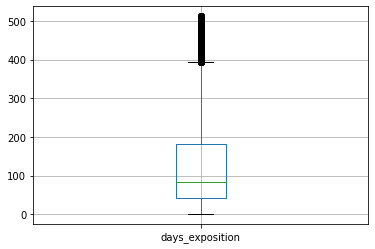

In [48]:
# данные без выбросов
data.query('days_exposition > @outliners_days_q1 and days_exposition < @outliners_days_q3').boxplot('days_exposition')

In [49]:
# описание данных без выбросов
data.query('days_exposition > @outliners_days_q1 and days_exposition < @outliners_days_q3')['days_exposition'].describe()

count    18606.000000
mean       129.181931
std        121.727377
min          1.000000
25%         42.000000
50%         85.000000
75%        183.000000
max        512.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

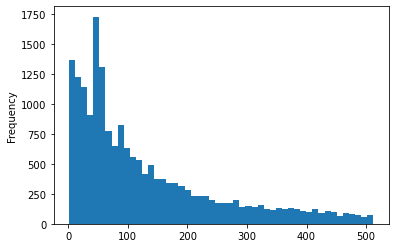

In [50]:
# гитсограмма без выбросов
data.query('days_exposition > @outliners_days_q1 and days_exposition < @outliners_days_q3')['days_exposition'].plot(kind='hist', bins=50)

In [51]:
# ищем закономерности в пиковых значениях на графике
data.query('days_exposition >= 45 and days_exposition <= 50')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_of_the_week_exposition,month_exposition,year_exposition,floor_categorie,kitchen_ratio,living_ratio
78,9,4350000.0,28.7,2018-02-22,1,2.6,19.0,18.0,6,NaN,...,0.0,NaN,45.0,151567,3,2,2018,другой,0.372822,0.627178
89,9,2500000.0,52.0,2018-10-25,3,2.5,5.0,43.0,4,NaN,...,NaN,NaN,45.0,48076,3,10,2018,другой,0.173077,0.826923
110,6,3850000.0,51.0,2017-09-29,2,2.6,3.0,27.4,2,NaN,...,NaN,NaN,45.0,75490,4,9,2017,другой,0.462745,0.537255
132,13,2699000.0,25.0,2017-10-13,1,2.5,9.0,19.0,7,NaN,...,0.0,NaN,49.0,107960,4,10,2017,другой,0.240000,0.760000
153,12,4350000.0,39.5,2017-05-21,2,2.6,9.0,31.2,2,NaN,...,0.0,NaN,45.0,110126,6,5,2017,другой,0.210127,0.789873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23613,4,3950000.0,54.5,2018-03-04,3,2.6,5.0,45.0,2,NaN,...,0.0,NaN,45.0,72477,6,3,2018,другой,0.174312,0.825688
23636,16,4100000.0,44.9,2017-12-06,2,2.6,17.0,34.0,15,NaN,...,3.0,501.0,48.0,91314,2,12,2017,другой,0.242762,0.757238
23670,9,2450000.0,26.6,2018-02-08,1,2.8,9.0,17.6,2,NaN,...,NaN,NaN,45.0,92105,3,2,2018,другой,0.338346,0.661654
23679,0,2500000.0,26.6,2017-12-08,1,2.6,9.0,17.6,4,NaN,...,NaN,NaN,45.0,93984,4,12,2017,другой,0.338346,0.661654


### Вывод


Ровно половина всех сделок заключается менее чем за 85 дней после размещения объявления, в таком случае имеет смысл принять 85, как границу до которой можно считать что сделки были совершены быстро.

оценив графики и выбросы можно сказать что половина сделок совершается довольно быстро, но так же на графике распределения мы видим что у нас есть 1655 выбросов, объявлений по которым на совершение сделки ушло очень много времени

## Работа с выбросами

# Задание: 
"Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "

In [52]:
# собираем отдельный датасет из нужных для исследования данных

research_data = data[['locality_name',
                      'square_meter_price',
                      'last_price', 
                      'total_area', 
                      'rooms',
                      'floor',
                      'ceiling_height',
                      'floor_categorie', 
                      'cityCenters_nearest', 
                      'first_day_exposition', 
                      'day_of_the_week_exposition', 
                      'month_exposition',
                      'year_exposition']]

In [53]:
# проводим корреляцию по всем параметрам, т.к. это не доставит неудобства при чтении и может открыть дополнительную информацию

research_data.corr()

,square_meter_price,last_price,total_area,rooms,floor,ceiling_height,cityCenters_nearest,day_of_the_week_exposition,month_exposition,year_exposition
square_meter_price,1.000000,0.729788,0.224465,0.048078,0.130489,0.075171,-0.265772,-0.001785,0.006090,-0.007720
last_price,0.729788,1.000000,0.594184,0.364519,0.028374,0.065881,-0.206399,0.001437,0.003217,-0.043018
total_area,0.224465,0.594184,1.000000,0.817696,-0.055650,0.088372,-0.241498,-0.008197,0.001286,-0.076746
rooms,0.048078,0.364519,0.817696,1.000000,-0.146329,0.052923,-0.188320,-0.003741,-0.000938,-0.054388
floor,0.130489,0.028374,-0.055650,-0.146329,1.000000,-0.016369,0.008107,0.011739,0.020059,0.005027
ceiling_height,0.075171,0.065881,0.088372,0.052923,-0.016369,1.000000,-0.074671,-0.010820,-0.004366,0.004057
cityCenters_nearest,-0.265772,-0.206399,-0.241498,-0.188320,0.008107,-0.074671,1.000000,0.009734,-0.009221,0.032342
day_of_the_week_exposition,-0.001785,0.001437,-0.008197,-0.003741,0.011739,-0.010820,0.009734,1.000000,0.009988,-0.003410
month_exposition,0.006090,0.003217,0.001286,-0.000938,0.020059,-0.004366,-0.009221,0.009988,1.000000,-0.269046
year_exposition,-0.007720,-0.043018,-0.076746,-0.054388,0.005027,0.004057,0.032342,-0.003410,-0.269046,1.000000


In [54]:
# считаем корреляцию по последнему и первому этажу с ценой

research_data.query('floor_categorie in ["первый", "последний"]')[['floor', 'last_price']].corr()

,floor,last_price
floor,1.000000,0.086598
last_price,0.086598,1.000000


<AxesSubplot:xlabel='floor_categorie', ylabel='last_price'>

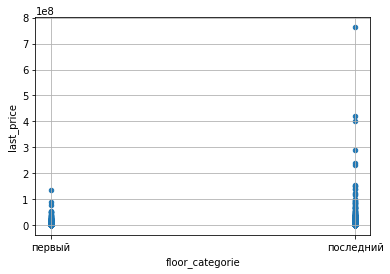

In [55]:
# визуализиуем
research_data.query('floor_categorie in ["первый", "последний"]')[['floor_categorie', 'last_price']].plot(kind='scatter', x='floor_categorie', y='last_price', grid=True)

Закономерно что за последний этаж в большенстве случаев цена выше

In [56]:
# считаем корреляцию по дню недели, месяцу и году размещения объявления

scatter_time_price = research_data[['last_price', 'day_of_the_week_exposition', 'month_exposition', 'year_exposition']]
research_data[['last_price', 'day_of_the_week_exposition', 'month_exposition', 'year_exposition']].corr()



,last_price,day_of_the_week_exposition,month_exposition,year_exposition
last_price,1.000000,0.001437,0.003217,-0.043018
day_of_the_week_exposition,0.001437,1.000000,0.009988,-0.003410
month_exposition,0.003217,0.009988,1.000000,-0.269046
year_exposition,-0.043018,-0.003410,-0.269046,1.000000


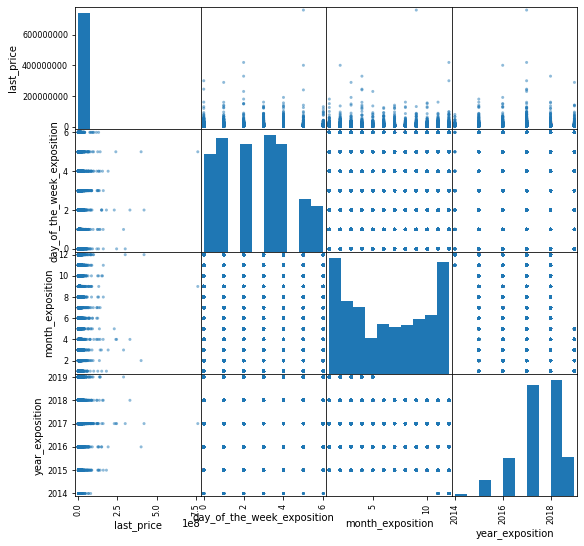

In [66]:
# матрица рассеивания для того чтобы оценить данные с визуально
pd.plotting.scatter_matrix(scatter_time_price, figsize=(9, 9))
plt.show()

Цена не зависит от дня, месяца и года размещения, что кажется нормальным, особенно относительно года, т.к. сильный скачёк в цене недвижимости в россии произошел в 2020 году, а данные приведены до начала 2019 года

# Задание
"Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'. "

In [67]:
# создаём отдельный сгруппированый датасет для работы в последних двух заданиях

research_data_locality_price =(
research_data[['locality_name', 'square_meter_price']].groupby('locality_name')
                                                      .agg(['count', 'mean'])
                                                      .sort_values(by=('square_meter_price', 'count'), ascending=False)
                                                      .astype('int')
                                                      .head(10)
)

research_data_locality_price

square_meter_price        
                             count    mean
locality_name                             
санкт-петербург              15542  157756
мурино                         559  113281
кудрово                        449  127409
шушары                         435  106628
всеволожск                     392   94898
пушкин                         369  140413
колпино                        338   99870
парголово                      323  127562
гатчина                        307   92032
выборг                         237   76173

In [68]:
# сортируем значения для того чтобы найти минимальное и максимальное значения стоимости квадратного метра

research_data_locality_price.sort_values(by=('square_meter_price',  'mean'))

square_meter_price        
                             count    mean
locality_name                             
выборг                         237   76173
гатчина                        307   92032
всеволожск                     392   94898
колпино                        338   99870
шушары                         435  106628
мурино                         559  113281
кудрово                        449  127409
парголово                      323  127562
пушкин                         369  140413
санкт-петербург              15542  157756

Минимальная средняя стоимость квадратного метра выявлена в Выборге = 76173, а максимальная в Санкт-Петербурге = 157756

# Задание: 
"Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "

In [69]:
# Собираем нужные данные для анализа, убирая пропуски. Их всего 60, 
# это меньше 1% от всех данных и они не повлияют на результаты исследования
research_data_locality_centers = research_data.loc[research_data['locality_name'] == 'санкт-петербург', 
                                                   ['locality_name', 'cityCenters_nearest', 'last_price']].dropna()

# переводим метры в километры и 
# меняем формат данных на int для удобства чтения графика
research_data_locality_centers['cityCenters_nearest'] = (research_data_locality_centers['cityCenters_nearest'] / 
                                                         1000).astype('int')

# высчитываем стоимость одного километра для каждой квартиры, при этом меняем тип данных игнорирую "бесконечные значения"
research_data_locality_centers['kilometr_price'] = ((research_data_locality_centers['last_price'] / 
                                                    research_data_locality_centers['cityCenters_nearest'])).replace(np.inf, np.nan).dropna().astype('int')


research_data_locality_centers = research_data_locality_centers.dropna()

research_data_locality_centers.head(5)

,locality_name,cityCenters_nearest,last_price,kilometr_price
0,санкт-петербург,16,13000000.0,812500.0
2,санкт-петербург,13,5196000.0,399692.0
3,санкт-петербург,6,64900000.0,10816666.0
4,санкт-петербург,8,10000000.0,1250000.0
7,санкт-петербург,11,7915000.0,719545.0


In [70]:
# описание данных
outliers = research_data_locality_centers['kilometr_price'].describe()
outliers

count    1.539600e+04
mean     1.453486e+06
std      5.935194e+06
min      1.354000e+03
25%      3.230760e+05
50%      4.677745e+05
75%      1.050000e+06
max      3.300000e+08
Name: kilometr_price, dtype: float64

In [71]:
# размах усов для датасета research_data_locality_centers
outliers_q1 = (outliers['25%'] - 1.5 * (outliers['75%'] - outliers['25%']))
outliers_q3 = (outliers['75%'] + 1.5 * (outliers['75%'] - outliers['25%']))

In [72]:
research_data_locality_centers['kilometr_price'].sort_values()

8793          1354.0
5961         83333.0
12160        84482.0
17961        93333.0
19755        94545.0
            ...     
13864    130000000.0
14706    200650000.0
12971    254333333.0
22831    289238400.0
1436     330000000.0
Name: kilometr_price, Length: 15396, dtype: float64

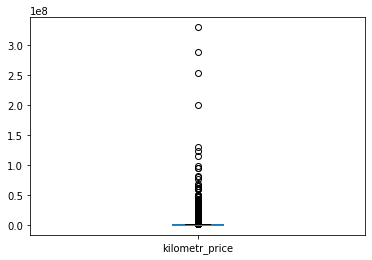

In [78]:
# ящик с выбросами
research_data_locality_centers.plot(y='kilometr_price', kind='box')
plt.show()

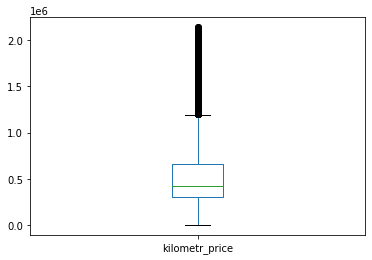

In [79]:
# ящик без выбросов из 15396 значений yбрано 2060 - 13.4% данных
(research_data_locality_centers.query('kilometr_price < @outliers_q3 and kilometr_price > @outliers_q1')
                                .plot(y='kilometr_price', kind='box'))
plt.show()

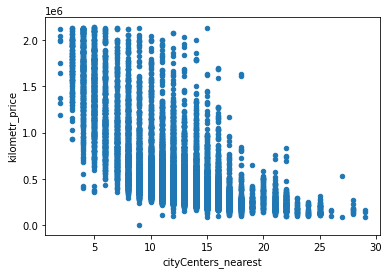

In [82]:
# график распределения для определения границы "центра города"
(research_data_locality_centers.query('kilometr_price < @outliers_q3 and kilometr_price > @outliers_q1')
                                .plot(y='kilometr_price', x='cityCenters_nearest', kind='scatter'))
plt.show()

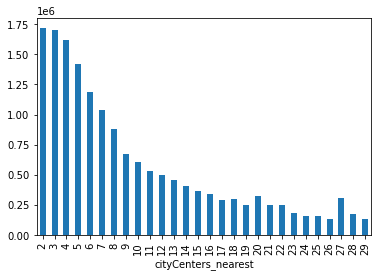

In [83]:
(research_data_locality_centers.query('kilometr_price < @outliers_q3 and kilometr_price > @outliers_q1')
 .groupby(by='cityCenters_nearest').agg('mean')['kilometr_price']
 .plot(y='kilometr_price', x='cityCenters_nearest', kind='bar'))
plt.show()

### Вывод

Резкое падение цены начинается от 2.5 - 3 км от центра, а значит условно круглую территорию с диаметром в 2.5 - 3 км можно считать центром города

# Задание

"Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"

In [86]:
# датасет для работы из предыдущего задания с нужными нам колонками
research_data_1 = data.loc[research_data['locality_name'] == 'санкт-петербург',
                        ['total_area',
                        'locality_name',
                                 'rooms', 
                                 'last_price',                                 
                                 'floor', 
                                 'first_day_exposition', 
                                 'cityCenters_nearest',
                                 'days_exposition',
                                 'ceiling_height']]

research_data_1 = research_data_1.dropna()
research_data_1['cityCenters_nearest'] = (research_data_1['cityCenters_nearest'] / 1000).astype('int')
research_data_1

,total_area,locality_name,rooms,last_price,floor,first_day_exposition,cityCenters_nearest,days_exposition,ceiling_height
2,42.6,санкт-петербург,2,5196000.0,4,2015-08-20,13,558.0,2.6
3,54.5,санкт-петербург,3,64900000.0,9,2015-07-24,6,424.0,2.6
4,73.0,санкт-петербург,2,10000000.0,13,2018-06-19,8,121.0,3.0
9,50.1,санкт-петербург,3,5400000.0,7,2017-02-26,15,289.0,2.5
10,28.8,санкт-петербург,1,5050000.0,3,2017-11-16,13,137.0,2.7
...,...,...,...,...,...,...,...,...,...
23688,78.0,санкт-петербург,3,9200000.0,12,2019-04-01,14,23.0,3.0
23689,25.4,санкт-петербург,1,3550000.0,4,2018-02-28,16,29.0,2.9
23690,37.0,санкт-петербург,2,5500000.0,2,2018-07-19,6,15.0,2.6
23691,50.9,санкт-петербург,2,9470000.0,7,2016-10-13,4,519.0,2.8


# Как факторы влияют на формирование цены (число комнат, этаж, удалённость от центра, дата размещения объявления)

In [87]:
# создаём новую колонку в которой переводив значения first_day_exposition в unix time чтобы проверить как они коррелируются с ценой, 
# т.к. проверить корреляцию в формате datetime64[ns] невозможно
research_data_1['first_day_exposition_timestemp'] = research_data_1['first_day_exposition'].apply(lambda x : (x - datetime.datetime(1970,1,1)).total_seconds())


# динамика цены по дате размещения

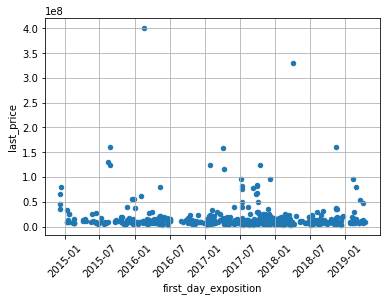

In [88]:
# данные с выбросами
(research_data_1.query('cityCenters_nearest < 2.5').sort_values(by='first_day_exposition')
                                                   .plot(x='first_day_exposition', y='last_price', kind='scatter', grid=True, rot=45))
plt.show()

In [89]:
# определяем границы выбросов
outliners_last_price = research_data_1.query('cityCenters_nearest < 2.5')['last_price'].describe()

outliners_last_price_q1 = (outliners_last_price['25%'] - 1.5 * (outliners_last_price['75%'] - outliners_last_price['25%']))
outliners_last_price_q3 = (outliners_last_price['75%'] + 1.5 * (outliners_last_price['75%'] - outliners_last_price['25%']))

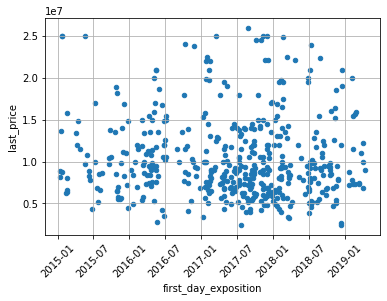

In [90]:
# строим график без выбросов
(research_data_1.query('last_price < @outliners_last_price_q3 and last_price > @outliners_last_price_q1 and cityCenters_nearest < 2.5')
 .plot(x='first_day_exposition', y='last_price', grid=True, rot=45, kind='scatter'))
plt.show()

Количество объявлений со врменем стало больше, но ценовая политика меняется незначительно, что в целом похоже на правду, т.к. резкий скачёк цен на недвижимость произошел после 2020 года

# динамика цены по числу комнат

In [91]:
#создаём отдельный датасет для задачи
research_data_2 = research_data[['rooms', 'last_price', 'cityCenters_nearest']]

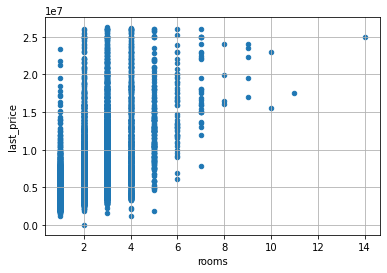

In [93]:
# данные без выброса по цене
(research_data_2.query('last_price < @outliners_last_price_q3 and last_price > @outliners_last_price_q1 and cityCenters_nearest > 2500')
 .plot(x='rooms', y='last_price', kind='scatter', grid=True))
plt.show()

Можно заметить чёткую линейную зависимость относительно цены от количества комнат

# динамика цены по этажу

In [94]:
#создаём отдельный датасет для задачи
research_data_3 = research_data[['floor_categorie', 'last_price', 'cityCenters_nearest']]

In [95]:
# создаём новую колонку чтобы перевести категории в целочисленное значение для возможнсоти обработки
def floor_coef(row):
    value = row['floor_categorie']
    if value == 'первый':
        return 1
    if value == 'последний':
        return 3
    return 2

research_data_3['floor_class'] = research_data_3.apply(floor_coef, axis = 1)

<ipython-input-95-da12712583a9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  research_data_3['floor_class'] = research_data_3.apply(floor_coef, axis = 1)


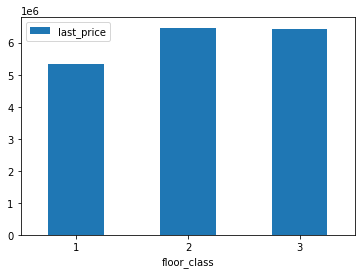

In [96]:
# 1 - первый
# 2 - другой
# 3 - последний


(research_data_3.query('last_price < @outliners_last_price_q3 and last_price > @outliners_last_price_q1 and cityCenters_nearest > 2500')
 .groupby('floor_class')
 .agg('mean')
 .plot(y='last_price', kind='bar', rot=0))
plt.show()

In [97]:
precent = (research_data_3.query('last_price < @outliners_last_price_q3 and last_price > @outliners_last_price_q1 and cityCenters_nearest > 2500')
 .groupby('floor_class')
 .agg('mean')['last_price'])

precent

floor_class
1    5.349646e+06
2    6.466315e+06
3    6.415809e+06
Name: last_price, dtype: float64

In [98]:
((precent[1] * 100/ precent[2] - 100) + (precent[1] * 100/ precent[3] - 100)) / 2

-16.943379667537187

Избавившись от ценовых выбросов мы видим увеличение средней цены за квартиры распологающихся выше первого этажа на 16.9%

# динамика цены по удалённости от центра

In [99]:
research_data_4 = research_data[['last_price', 'cityCenters_nearest']]

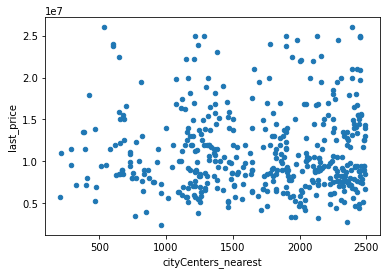

In [101]:
# график без выбросов по цене
(research_data_4.query('last_price < @outliners_last_price_q3 and last_price > @outliners_last_price_q1 and cityCenters_nearest < 2500')
.plot(x='cityCenters_nearest', y='last_price',  kind='scatter'))
plt.show()

Можно проследить во-первых, квартир ближе к центру становится меньше, но в целом это не влияет на ценовую политику

In [102]:
# корреляция всех данных по центру города без выброса по цене
df1_corr = (research_data_1.query('last_price < @outliners_last_price_q3 and last_price > @outliners_last_price_q1 and cityCenters_nearest < 2.5')
 [['last_price', 'rooms', 'first_day_exposition_timestemp', 'cityCenters_nearest', 'ceiling_height']]).corr()
df1_corr

,last_price,rooms,first_day_exposition_timestemp,cityCenters_nearest,ceiling_height
last_price,1.000000,0.481113,-0.053358,-0.071102,0.193087
rooms,0.481113,1.000000,-0.138371,-0.015401,0.033620
first_day_exposition_timestemp,-0.053358,-0.138371,1.000000,0.003332,0.019195
cityCenters_nearest,-0.071102,-0.015401,0.003332,1.000000,0.034923
ceiling_height,0.193087,0.033620,0.019195,0.034923,1.000000


In [103]:
# данные коррелиций для всего остального города
df2_corr = (research_data_1.query('last_price < @outliners_last_price_q3 and last_price > @outliners_last_price_q1 and cityCenters_nearest > 2.5')
 [['last_price', 'rooms', 'first_day_exposition_timestemp', 'cityCenters_nearest', 'ceiling_height']].corr())
df2_corr

,last_price,rooms,first_day_exposition_timestemp,cityCenters_nearest,ceiling_height
last_price,1.000000,0.542112,-0.057581,-0.382069,0.084548
rooms,0.542112,1.000000,-0.083887,-0.221964,0.026118
first_day_exposition_timestemp,-0.057581,-0.083887,1.000000,0.077271,0.006439
cityCenters_nearest,-0.382069,-0.221964,0.077271,1.000000,-0.074921
ceiling_height,0.084548,0.026118,0.006439,-0.074921,1.000000


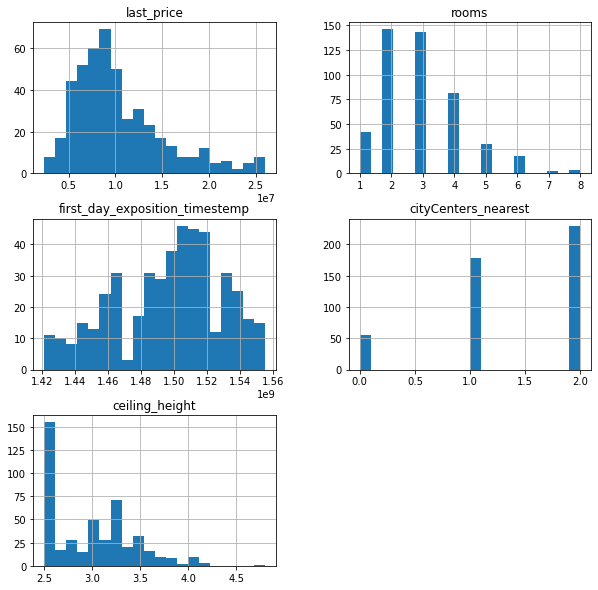

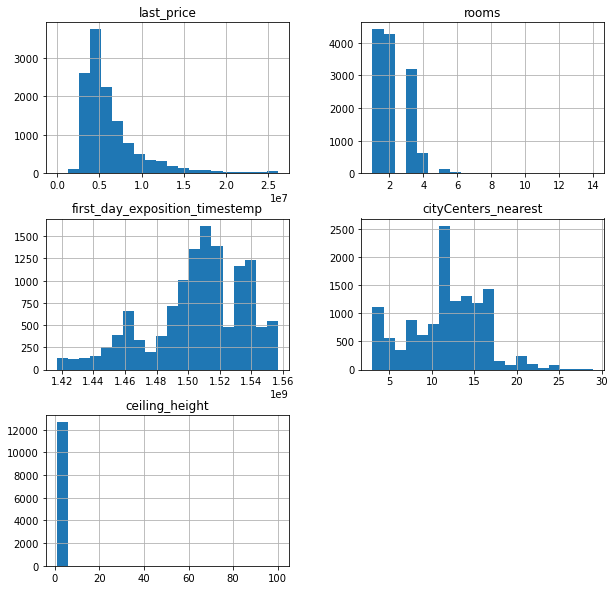

In [105]:
# корреляция всех данных по центру города без выброса по цене
df1 = ((research_data_1.query('last_price < @outliners_last_price_q3 and last_price > @outliners_last_price_q1 and cityCenters_nearest < 2.5')
 [['last_price', 'rooms', 'first_day_exposition_timestemp', 'cityCenters_nearest', 'ceiling_height']]))

# данные коррелиций для всего остального города
df2 = (research_data_1.query('last_price < @outliners_last_price_q3 and last_price > @outliners_last_price_q1 and cityCenters_nearest > 2.5')
 [['last_price', 'rooms', 'first_day_exposition_timestemp', 'cityCenters_nearest', 'ceiling_height']])

#графики для центра города
df1.hist(figsize=(10, 10), bins=20)
#графики для остального города
df2.hist(figsize=(10, 10), bins=20)
plt.show()

# Вывод

<font color='red'> Центр города: </font> 

Из полученных данных корреляции можем сделать вывод что самым влиятельным фактором на формирование цены является только количество комнат с результатом корреляции 0.481113, 

Вторым по значимости и с небольшой положительной корреляцией стал параметр высота потолков 0.193087

<font color='red'> Данные по остальному городу имеют следующие характерные отличия: </font> 

Расстояние от центра приобретает чёткую отрицательную тенденцию -0.382069

Корреляция с количеством комнат стала сильнее 0.542112

Мы уже видели что корреляция с высотой околонулевая 0.084548, падение корреляции на больших данных доказывает что это малозначимй фактор для ценообразования



## Общий вывод

<font color='red'> Предобработка: </font> 

В данных было большое количество пропущенных значений, но для работы нас интересовали только следующие колонки: 
колонка ceiling_height имеет 38.8% пропусков.
колонка floors_total имеет 0.4% пропусков.
колонка kitchen_area имеет 9.6% пропусков.
колонка living_area имеет 8.0% пропусков.
колонка locality_name имеет 0.2% пропусков.
колонка cityCenters_nearest имеет 23.3% пропусков.

Пропуски в колонке ceiling_height были заполнены медианой, т.к. параметр является малозначимым, а медиана в целом даёт реальное представление о порядке вещей.

колонка floors_total имеет 0.4% пропусков и колонка locality_name имеет 0.2% пропусков > 1%. Пренебрегли этими данными в работе.

колонка kitchen_area имеет 9.6% пропусков и колонка living_area имеет 8.0% пропусков. В обоих случаях площадь была заполнена медианой из сгруппированным по количеству комнат данных.

колонка days_exposition имеет 13.4% пропусков. Изучив данные пришел к выводу, что пропуски в данных не отображаются по причине того что объявление всё ещё находится на сайте и подсчёт для таких данных в этой колонке не ведётся. Заполнить эти данные можно определив дату выгрузки по самым поздним датам в колонке first_day_exposition. Делать этого не потребовалось, т.к. в был применён другой подход. Я перевёл значения в first_day_exposition в unix time и таким образом делал вычисления. Таким подходом данные как раз отображали давность размещения объявлений

</b>Общие итоги предобработки:</b>
* Произведена обработка пропущенных значений в значимых для исследования данных 
* Произведена обработка неявных дубликатов
* Произведена замена типов данных.
* Добавлена цена квадратного метра площади;
* Добавлены день недели, месяц и год публикации объявления;
* Добавлен столбец категорий этажей: первый, последний, другой;
* Добавлены соотношение жилой и общей площади, а также отношение площади кухни к общей.
* Изучены следующие параметры: площадь, цена, число комнат, высота потолков, время продажи квартиры.
* Удалены редкие и выбивающиеся значения


<font color='red'> Исследовательский анализ данных: </font> 

Итогом исследовательского анализа стала обработка результатов выборки и корреляции параметров для центра города Санкт-Петербург и остальной его частью.

Глобально были выявлены следующие закономерности (в скобках указана корреляция):
* С удалением от города цена уменьшалась, это видно по отрицательной корреляции для остальной части города (-0.382069) против (-0.071102) для его центральной части;
* Высота потолка в целом имеет не очень большую корреляцию с ценой, а на больших данных и вовсе теряет своё значение. Центр (0.193087), остально город (0.084548);
* День публикации не играет никакой роли, околонулевая кореляция для обоих случаев. Центр (-0.053358), остальной город(-0.057581);
* Самая сильная корреляция в обоих случаях появляется в количестве комнат, что очень логично, ведь комнаты коррелируются с общей площадью, а следовательно и с ценой. На больших данных параметр комнат только усиливается. Центр (0.481113), остальной город(0.542112);


